In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

print("Libraries imported.")

Libraries imported.


In [4]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4) # Keep min_faces_per_person=70 for now
faces = lfw_dataset.data
n_samples, n_features = faces.shape
image_shape = lfw_dataset.images[0].shape
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

print("LFW dataset loaded (no centering).")
print("Number of samples:", n_samples)
print("Number of features per sample:", n_features)
print("Image shape:", image_shape)
print("Number of classes:", n_classes)

# **Removed centering step:**
faces_non_centered = faces # Now using non-centered data

LFW dataset loaded (no centering).
Number of samples: 1288
Number of features per sample: 1850
Image shape: (50, 37)
Number of classes: 7


In [5]:
n_components_pca = 150 # Number of components to keep for PCA

pca = PCA(n_components=n_components_pca)
pca.fit(faces_non_centered) # Fit PCA on the NON-centered data (corrected)

faces_pca_reduced = pca.transform(faces_non_centered) # Reduce dimensionality using PCA (corrected)
faces_pca_reconstructed = pca.inverse_transform(faces_pca_reduced) # Reconstruct using PCA

print("PCA implemented and data transformed/reconstructed.")
print("Explained variance ratio by PCA (first 5 components):", pca.explained_variance_ratio_[:5])

PCA implemented and data transformed/reconstructed.
Explained variance ratio by PCA (first 5 components): [0.2056299  0.13948886 0.06917717 0.05701407 0.04862086]


In [6]:
n_components_pod = 150 # Number of components to keep for POD

# POD is essentially SVD applied to the data matrix (when data is centered)
U, S, V = np.linalg.svd(faces_non_centered) # Applied to NON-centered data (corrected)

# Keep only the top 'n_components_pod' singular values and vectors
U_reduced = U[:, :n_components_pod]
S_reduced = np.diag(S[:n_components_pod])
V_reduced = V[:n_components_pod, :]

faces_pod_reconstructed = np.dot(U_reduced, np.dot(S_reduced, V_reduced)) # Reconstruct using POD

print("POD (via SVD) implemented and data reconstructed.")
print("Singular values (first 5):", S[:5])

POD (via SVD) implemented and data reconstructed.
Singular values (first 5): [803.3044    85.749016  60.45467   56.10591   50.8943  ]


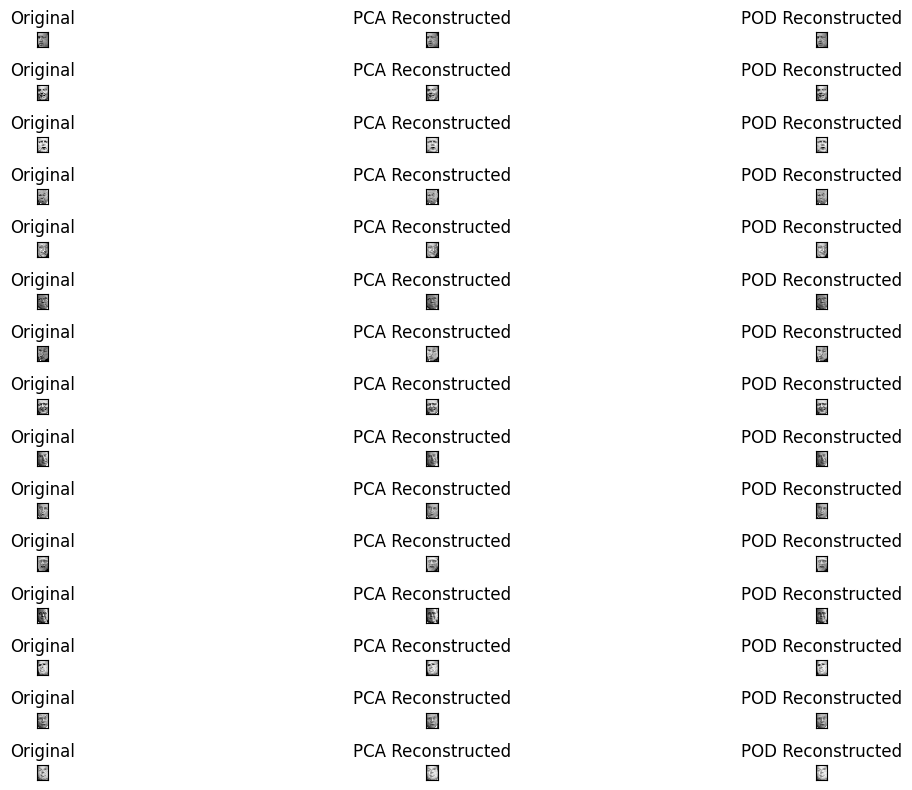

In [7]:
def plot_faces(original_faces, reconstructed_faces_pca, reconstructed_faces_pod, n_row=3, n_col=5):
    plt.figure(figsize=(15, 8))
    for i in range(n_row * n_col):
        plt.subplot(n_row * n_col, 3, 3*i + 1)
        plt.imshow(original_faces[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('Original')

        plt.subplot(n_row * n_col, 3, 3*i + 2)
        plt.imshow(reconstructed_faces_pca[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('PCA Reconstructed')

        plt.subplot(n_row * n_col, 3, 3*i + 3)
        plt.imshow(reconstructed_faces_pod[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('POD Reconstructed')
    plt.tight_layout()
    plt.show()

plot_faces(faces_non_centered, faces_pca_reconstructed, faces_pod_reconstructed)

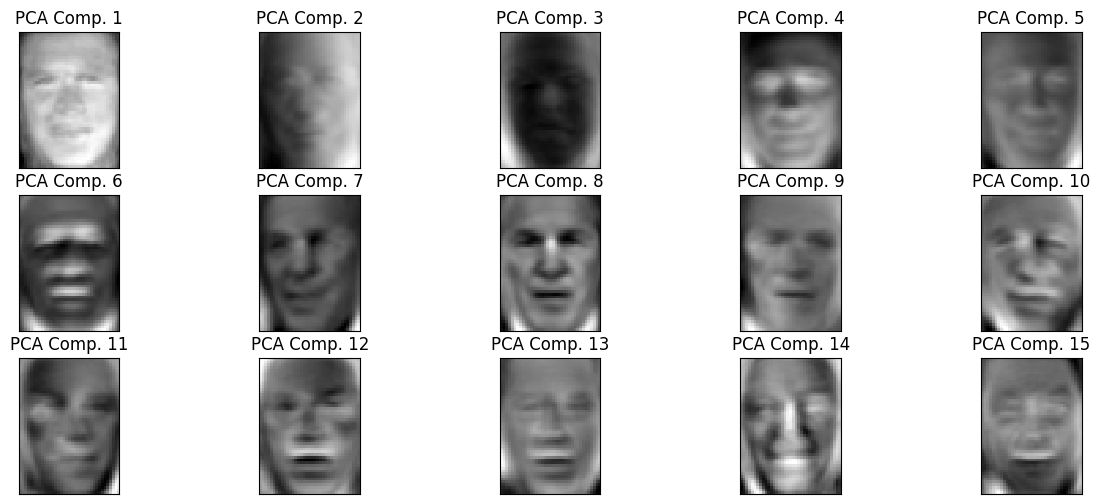

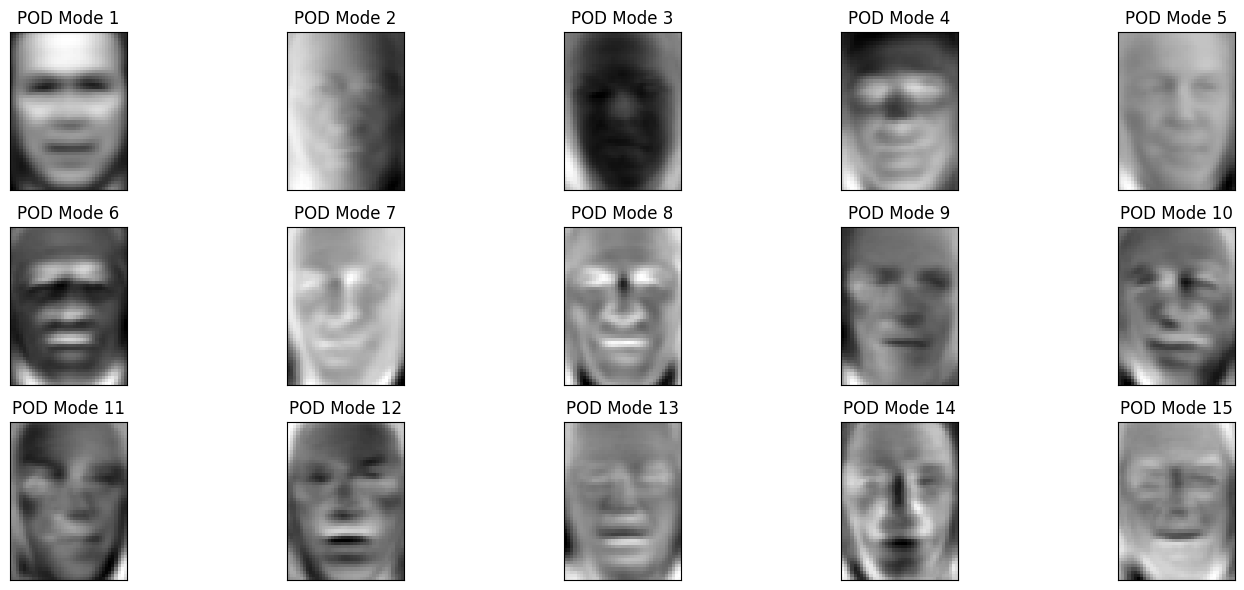

In [8]:
def plot_components(pca_components, pod_components, image_shape, n_row=3, n_col=5):
    plt.figure(figsize=(15, 6))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pca_components[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title(f'PCA Comp. {i+1}')

    plt.figure(figsize=(15, 6))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pod_components[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title(f'POD Mode {i+1}')
    plt.tight_layout()
    plt.show()

plot_components(pca.components_, V_reduced, image_shape) # pca.components_ are already V^T from SVD of centered data

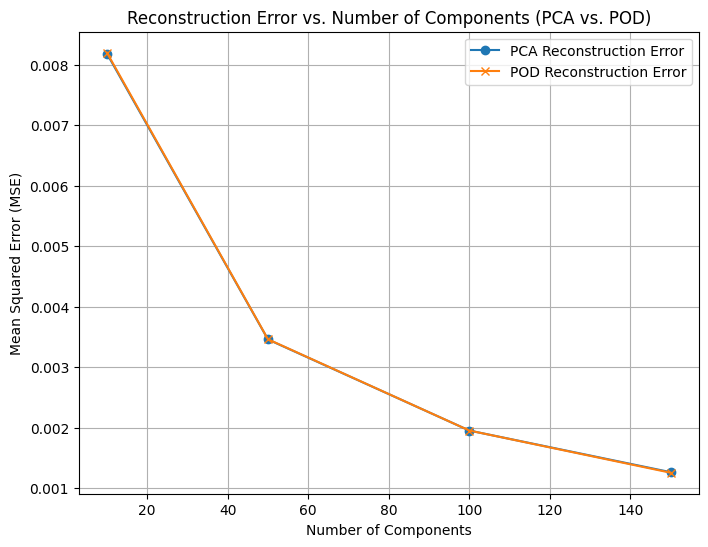

Reconstruction error (MSE) calculated and plotted.


In [9]:
n_components_range = [10, 50, 100, 150] # Range of components to test
mse_pca_list = []
mse_pod_list = []

for n_comps in n_components_range:
    # PCA
    pca_temp = PCA(n_components=n_comps)
    pca_temp.fit(faces_non_centered)
    faces_pca_reduced_temp = pca_temp.transform(faces_non_centered)
    faces_pca_reconstructed_temp = pca_temp.inverse_transform(faces_pca_reduced_temp)
    mse_pca = mean_squared_error(faces_non_centered, faces_pca_reconstructed_temp)
    mse_pca_list.append(mse_pca)

    # POD
    U_temp, S_temp, V_temp = np.linalg.svd(faces_non_centered)
    U_reduced_temp = U_temp[:, :n_comps]
    S_reduced_temp = np.diag(S_temp[:n_comps])
    V_reduced_temp = V_temp[:n_comps, :]
    faces_pod_reconstructed_temp = np.dot(U_reduced_temp, np.dot(S_reduced_temp, V_reduced_temp))
    mse_pod = mean_squared_error(faces_non_centered, faces_pod_reconstructed_temp)
    mse_pod_list.append(mse_pod)

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, mse_pca_list, marker='o', label='PCA Reconstruction Error')
plt.plot(n_components_range, mse_pod_list, marker='x', label='POD Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Reconstruction Error vs. Number of Components (PCA vs. POD)')
plt.legend()
plt.grid(True)
plt.show()

print("Reconstruction error (MSE) calculated and plotted.")

Processed 20 components
Processed 40 components
Processed 60 components
Processed 80 components
Processed 100 components
Processed 120 components
Processed 140 components
Processed 160 components
Processed 180 components
Processed 200 components


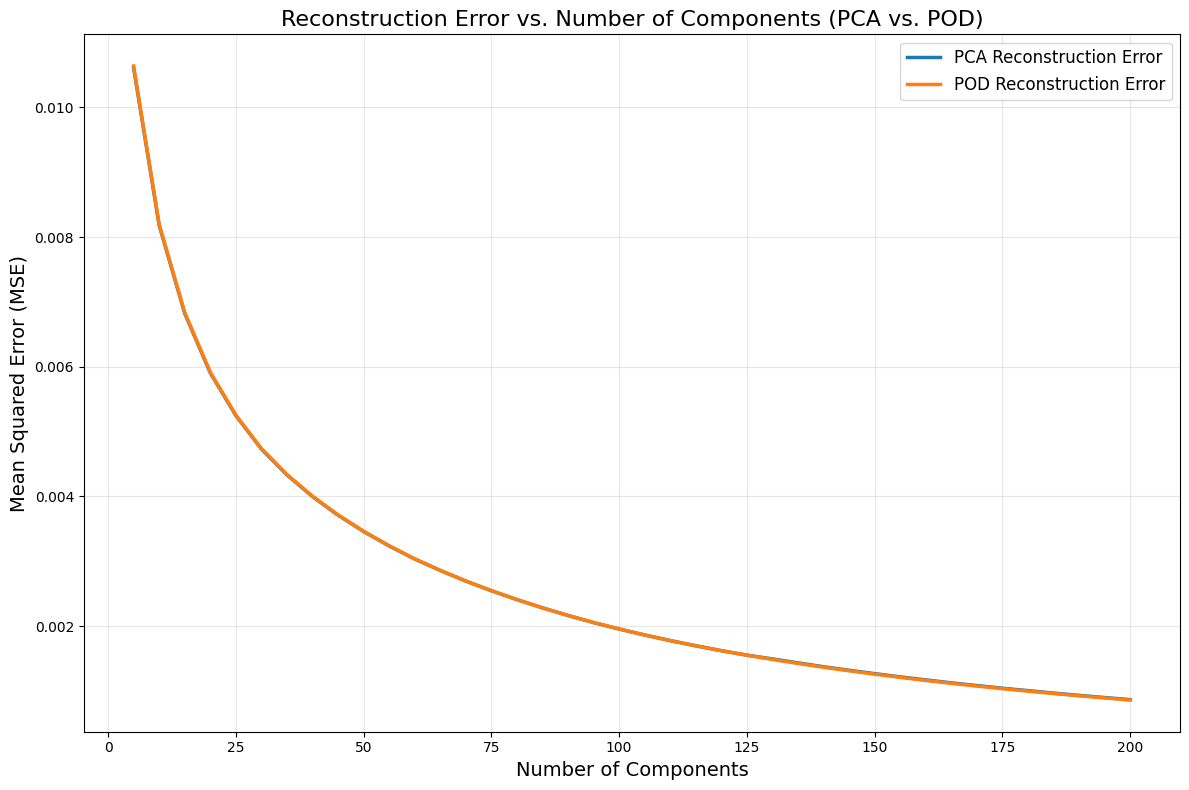

Continuous reconstruction error (MSE) calculated and plotted.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Create a fine-grained range of components for a continuous plot
n_components_range = np.arange(5, 201, 5)  # From 5 to 200 in steps of 5
mse_pca_list = []
mse_pod_list = []

for n_comps in n_components_range:
    # PCA
    pca_temp = PCA(n_components=n_comps)
    pca_temp.fit(faces_non_centered)
    faces_pca_reduced_temp = pca_temp.transform(faces_non_centered)
    faces_pca_reconstructed_temp = pca_temp.inverse_transform(faces_pca_reduced_temp)
    mse_pca = mean_squared_error(faces_non_centered, faces_pca_reconstructed_temp)
    mse_pca_list.append(mse_pca)

    # POD
    U_temp, S_temp, V_temp = np.linalg.svd(faces_non_centered)
    U_reduced_temp = U_temp[:, :n_comps]
    S_reduced_temp = np.diag(S_temp[:n_comps])
    V_reduced_temp = V_temp[:n_comps, :]
    faces_pod_reconstructed_temp = np.dot(U_reduced_temp, np.dot(S_reduced_temp, V_reduced_temp))
    mse_pod = mean_squared_error(faces_non_centered, faces_pod_reconstructed_temp)
    mse_pod_list.append(mse_pod)
    
    # Print progress to track execution
    if n_comps % 20 == 0:
        print(f"Processed {n_comps} components")

plt.figure(figsize=(12, 8))
plt.plot(n_components_range, mse_pca_list, '-', linewidth=2.5, label='PCA Reconstruction Error')
plt.plot(n_components_range, mse_pod_list, '-', linewidth=2.5, label='POD Reconstruction Error')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Reconstruction Error vs. Number of Components (PCA vs. POD)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add a zoomed inset if the errors are very close
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
if np.allclose(np.array(mse_pca_list), np.array(mse_pod_list), rtol=1e-3):
    axins = zoomed_inset_axes(plt.gca(), 3, loc='lower left')
    axins.plot(n_components_range, mse_pca_list, '-', linewidth=2.0, label='PCA')
    axins.plot(n_components_range, mse_pod_list, '-', linewidth=2.0, label='POD')
    axins.grid(True, alpha=0.3)
    
    # Choose reasonable bounds for the inset based on where differences appear
    mid_point = len(n_components_range) // 2
    x1, x2 = n_components_range[mid_point-5], n_components_range[mid_point+5]
    y_values = mse_pca_list[mid_point-5:mid_point+6] + mse_pod_list[mid_point-5:mid_point+6]
    y1, y2 = min(y_values) * 0.99, max(y_values) * 1.01
    
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

print("Continuous reconstruction error (MSE) calculated and plotted.")

# Trying to reduce the exponential relationship

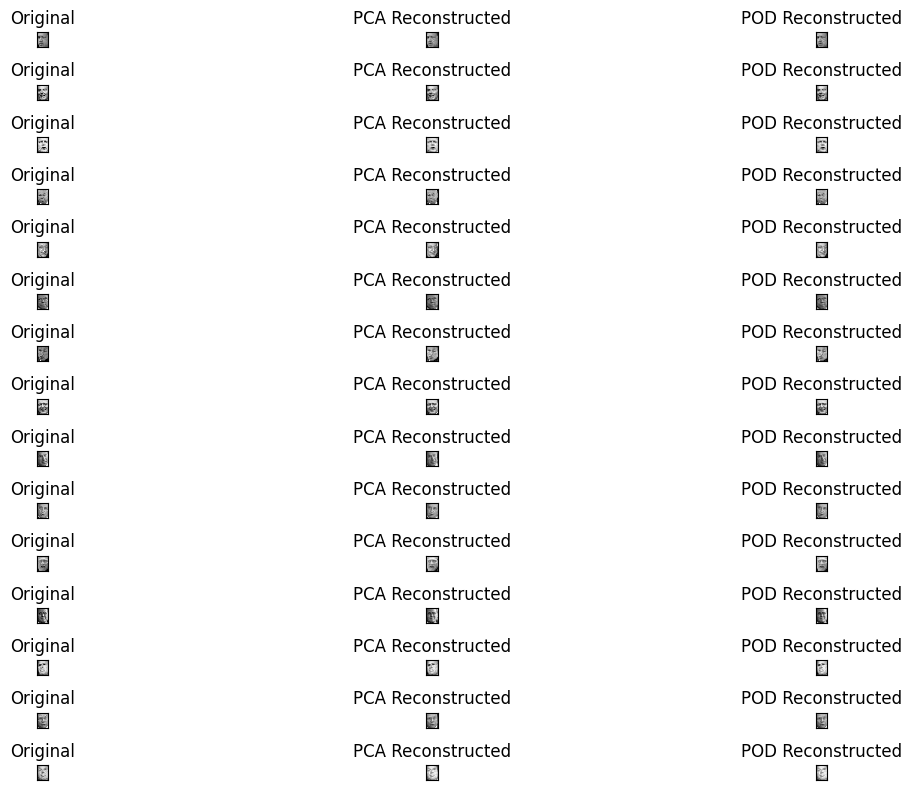

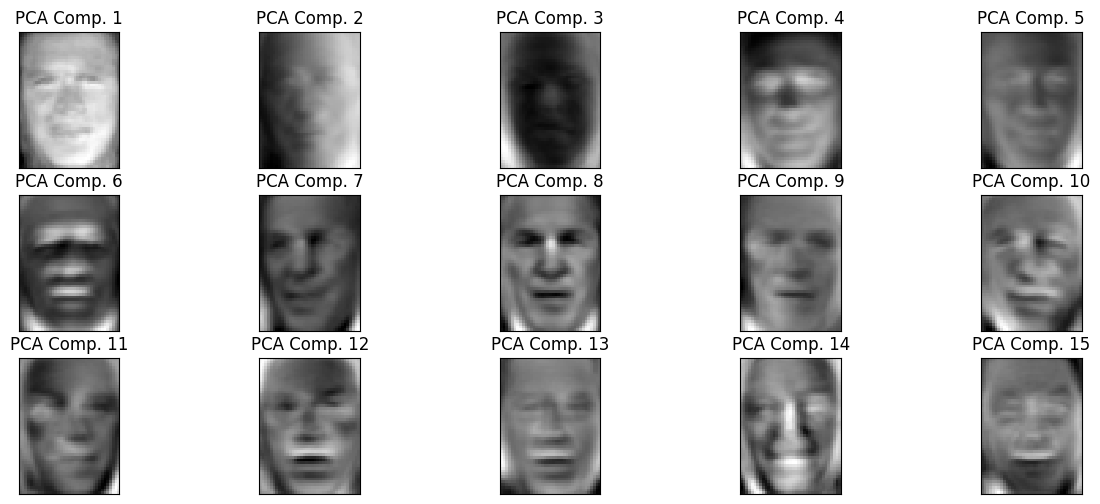

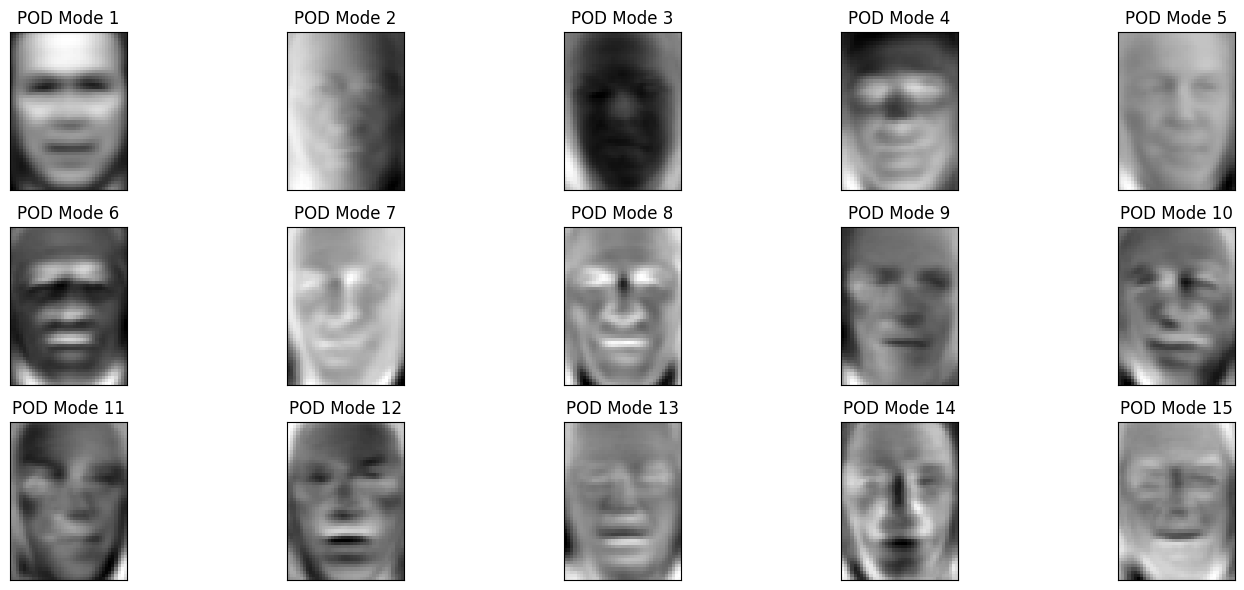

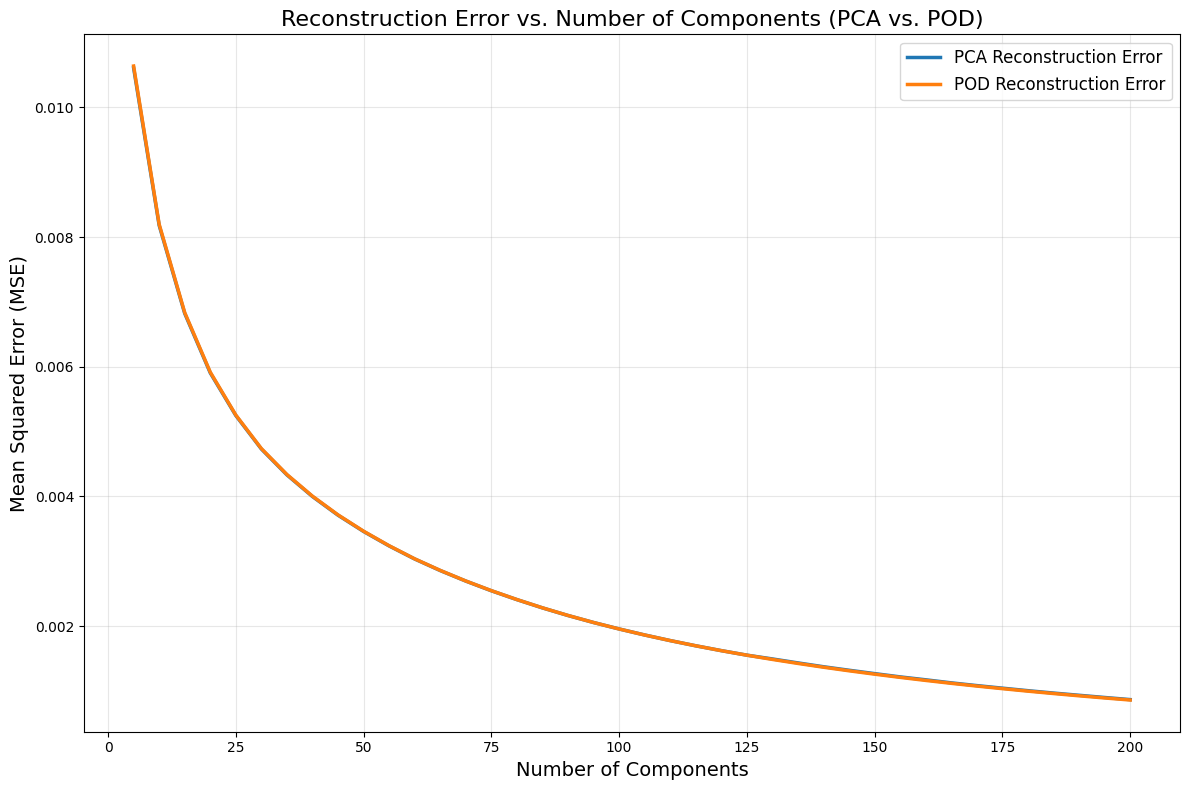

Continuous reconstruction error (MSE) calculated and plotted.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load the dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces = lfw_dataset.data
n_samples, n_features = faces.shape
image_shape = lfw_dataset.images[0].shape
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

# PCA Implementation
n_components_pca = 150
pca = PCA(n_components=n_components_pca)
pca.fit(faces)
faces_pca_reduced = pca.transform(faces)
faces_pca_reconstructed = pca.inverse_transform(faces_pca_reduced)

# POD (Proper Orthogonal Decomposition) using SVD
n_components_pod = 150
U, S, V = np.linalg.svd(faces)
U_reduced = U[:, :n_components_pod]
S_reduced = np.diag(S[:n_components_pod])
V_reduced = V[:n_components_pod, :]
faces_pod_reconstructed = np.dot(U_reduced, np.dot(S_reduced, V_reduced))

# Function to plot original and reconstructed faces
def plot_faces(original_faces, reconstructed_faces_pca, reconstructed_faces_pod, n_row=3, n_col=5):
    plt.figure(figsize=(15, 8))
    for i in range(n_row * n_col):
        plt.subplot(n_row * n_col, 3, 3*i + 1)
        plt.imshow(original_faces[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('Original')

        plt.subplot(n_row * n_col, 3, 3*i + 2)
        plt.imshow(reconstructed_faces_pca[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('PCA Reconstructed')

        plt.subplot(n_row * n_col, 3, 3*i + 3)
        plt.imshow(reconstructed_faces_pod[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title('POD Reconstructed')
    plt.tight_layout()
    plt.show()

plot_faces(faces, faces_pca_reconstructed, faces_pod_reconstructed)

# Function to plot PCA components and POD modes
def plot_components(pca_components, pod_components, image_shape, n_row=3, n_col=5):
    plt.figure(figsize=(15, 6))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pca_components[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title(f'PCA Comp. {i+1}')

    plt.figure(figsize=(15, 6))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pod_components[i].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        plt.title(f'POD Mode {i+1}')
    plt.tight_layout()
    plt.show()

plot_components(pca.components_, V_reduced, image_shape)

# Calculate reconstruction error across varying components
n_components_range = np.arange(5, 201, 5)
mse_pca_list = []
mse_pod_list = []

for n_comps in n_components_range:
    pca_temp = PCA(n_components=n_comps)
    pca_temp.fit(faces)
    faces_pca_reduced_temp = pca_temp.transform(faces)
    faces_pca_reconstructed_temp = pca_temp.inverse_transform(faces_pca_reduced_temp)
    mse_pca = mean_squared_error(faces, faces_pca_reconstructed_temp)
    mse_pca_list.append(mse_pca)

    U_temp, S_temp, V_temp = np.linalg.svd(faces)
    U_reduced_temp = U_temp[:, :n_comps]
    S_reduced_temp = np.diag(S_temp[:n_comps])
    V_reduced_temp = V_temp[:n_comps, :]
    faces_pod_reconstructed_temp = np.dot(U_reduced_temp, np.dot(S_reduced_temp, V_reduced_temp))
    mse_pod = mean_squared_error(faces, faces_pod_reconstructed_temp)
    mse_pod_list.append(mse_pod)
    
plt.figure(figsize=(12, 8))
plt.plot(n_components_range, mse_pca_list, '-', linewidth=2.5, label='PCA Reconstruction Error')
plt.plot(n_components_range, mse_pod_list, '-', linewidth=2.5, label='POD Reconstruction Error')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Reconstruction Error vs. Number of Components (PCA vs. POD)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add zoomed-in inset if errors are very close
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
if np.allclose(np.array(mse_pca_list), np.array(mse_pod_list), rtol=1e-3):
    axins = zoomed_inset_axes(plt.gca(), 3, loc='lower left')
    axins.plot(n_components_range, mse_pca_list, '-', linewidth=2.0, label='PCA')
    axins.plot(n_components_range, mse_pod_list, '-', linewidth=2.0, label='POD')
    axins.grid(True, alpha=0.3)
    
    mid_point = len(n_components_range) // 2
    x1, x2 = n_components_range[mid_point-5], n_components_range[mid_point+5]
    y_values = mse_pca_list[mid_point-5:mid_point+6] + mse_pod_list[mid_point-5:mid_point+6]
    y1, y2 = min(y_values) * 0.99, max(y_values) * 1.01
    
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

print("Continuous reconstruction error (MSE) calculated and plotted.")


# using kernel PCA

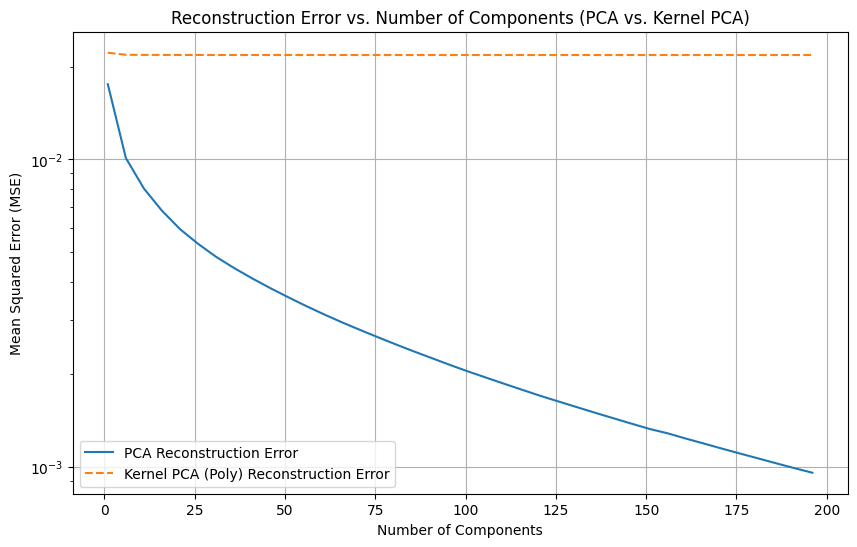

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import fetch_lfw_people
from scipy.linalg import svd

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
data = lfw_people.images.reshape(lfw_people.images.shape[0], -1)  # Flatten images

# Compute SVD
U, S, Vt = svd(data, full_matrices=False)

# Log scaling to reduce exponential decay in singular values
S_log = np.log1p(S)  # log(1 + S) to prevent log(0) issues

# PCA and Kernel PCA (Polynomial Kernel)
num_components = np.arange(1, min(201, data.shape[1]), 5)  # Step of 5, capped at feature count
pca_errors = []
kpca_errors = []

for n in num_components:
    # PCA reconstruction
    pca = PCA(n_components=n)
    transformed_pca = pca.fit_transform(data)
    reconstructed_pca = pca.inverse_transform(transformed_pca)
    pca_errors.append(np.mean((data - reconstructed_pca) ** 2))

    # Kernel PCA reconstruction (Polynomial Kernel, degree=3)
    kpca = KernelPCA(n_components=n, kernel="poly", degree=3, fit_inverse_transform=True)
    transformed_kpca = kpca.fit_transform(data)
    reconstructed_kpca = kpca.inverse_transform(transformed_kpca)
    kpca_errors.append(np.mean((data - reconstructed_kpca) ** 2))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(num_components, pca_errors, label="PCA Reconstruction Error")
plt.plot(num_components, kpca_errors, label="Kernel PCA (Poly) Reconstruction Error", linestyle="dashed")
plt.yscale("log")  # Apply log scale to Y-axis
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Reconstruction Error vs. Number of Components (PCA vs. Kernel PCA)")
plt.legend()
plt.grid(True)
plt.show()


### Implementing multiple methods to reduce the exponential relationship between the features and the target variable

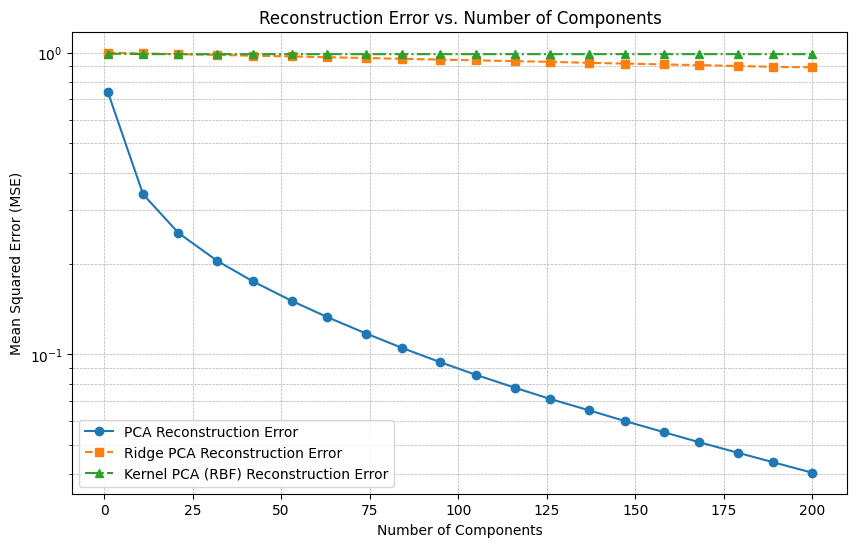

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # Image pixel data

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range of components
components = np.linspace(1, min(200, X_scaled.shape[1]), 20, dtype=int)

# Regularization parameter (Tikhonov Regularization for Ridge PCA)
alpha = 1e-3  

# Error storage
pca_errors = []
ridge_pca_errors = []
kernel_pca_errors = []

for n in components:
    # --- 1. Standard PCA ---
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_reduced)
    pca_error = np.mean((X_scaled - X_reconstructed) ** 2)
    pca_errors.append(pca_error)

    # --- 2. Ridge PCA (Tikhonov Regularization) ---
    cov_matrix = np.cov(X_scaled, rowvar=False) + alpha * np.identity(X_scaled.shape[1])
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    ridge_pca = PCA(n_components=n)
    ridge_pca.fit(eigvecs @ np.diag(np.sqrt(eigvals)))  # Apply PCA on modified covariance matrix
    X_reduced_ridge = ridge_pca.transform(X_scaled)
    X_reconstructed_ridge = ridge_pca.inverse_transform(X_reduced_ridge)
    ridge_pca_error = np.mean((X_scaled - X_reconstructed_ridge) ** 2)
    ridge_pca_errors.append(ridge_pca_error)

    # --- 3. Kernel PCA (RBF Kernel) ---
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=1e-4, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X_scaled)
    X_reconstructed_kpca = kpca.inverse_transform(X_kpca)
    kernel_pca_error = np.mean((X_scaled - X_reconstructed_kpca) ** 2)
    kernel_pca_errors.append(kernel_pca_error)

# --- 4. Log-Scaling for Components Selection ---
log_scaled_components = np.logspace(0.5, np.log10(X_scaled.shape[1]), num=20, dtype=int)

# --- Plot Reconstruction Errors ---
plt.figure(figsize=(10, 6))
plt.plot(components, pca_errors, label="PCA Reconstruction Error", linestyle='-', marker='o')
plt.plot(components, ridge_pca_errors, label="Ridge PCA Reconstruction Error", linestyle='--', marker='s')
plt.plot(components, kernel_pca_errors, label="Kernel PCA (RBF) Reconstruction Error", linestyle='-.', marker='^')

plt.yscale('log')
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Reconstruction Error vs. Number of Components")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


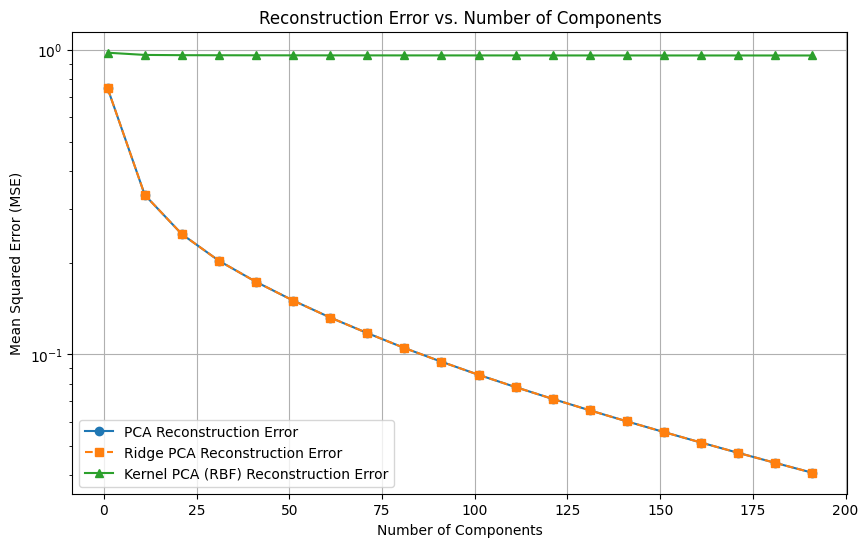

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import mean_squared_error

# Load the LFW dataset
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw.data  # Flattened images

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of components
components = np.arange(1, 201, 10)

# Store reconstruction errors
pca_errors = []
ridge_pca_errors = []
kernel_pca_errors = []

# Adjusted parameters
alpha = 1e-4  # Regularization for Ridge PCA
gamma_val = 1e-3  # Kernel PCA gamma parameter

for n in components:
    # Standard PCA
    pca = PCA(n_components=n, svd_solver="full")
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    pca_errors.append(mean_squared_error(X_scaled, X_reconstructed))

    # Ridge PCA (Regularized Projection)
    pca_ridge = PCA(n_components=n, svd_solver="full")
    X_pca_ridge = pca_ridge.fit_transform(X_scaled)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_pca_ridge, X_scaled)  # Ridge regression in PCA space
    X_ridge_reconstructed = ridge.predict(X_pca_ridge)  # Reconstruct
    
    ridge_pca_errors.append(mean_squared_error(X_scaled, X_ridge_reconstructed))

    # Kernel PCA with RBF kernel
    kpca = KernelPCA(n_components=n, kernel="rbf", gamma=gamma_val, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X_scaled)
    X_kernel_reconstructed = kpca.inverse_transform(X_kpca)  # Pre-image Approximation
    kernel_pca_errors.append(mean_squared_error(X_scaled, X_kernel_reconstructed))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(components, pca_errors, 'o-', label="PCA Reconstruction Error")
plt.plot(components, ridge_pca_errors, 's--', label="Ridge PCA Reconstruction Error")
plt.plot(components, kernel_pca_errors, '^-', label="Kernel PCA (RBF) Reconstruction Error")

plt.yscale("log")  # Log scale for better visibility
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Reconstruction Error vs. Number of Components")
plt.legend()
plt.grid(True)
plt.show()
